# Import necessary libraries

In [1]:
import numpy as np
import pandas as pd # for converting the csv into a df
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # stats data viz
from sklearn.model_selection import train_test_split # for train and testing data
from sklearn.ensemble import RandomForestRegressor #for ML and reducing overfitting for predictions
from sklearn import metrics # for checking r2-score


## Load data

In [2]:
gold_data = pd.read_csv("C:/Users/josep/Downloads/archive (7)/gld_price_data.csv")

# View data

In [3]:
gold_data.head(10) #view the first 10 records

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180000,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285000,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167000,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053000,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590000,1.557099
5,1/9/2008,1409.130005,86.550003,75.250000,15.520000,1.466405
6,1/10/2008,1420.329956,88.250000,74.019997,16.061001,1.480100
7,1/11/2008,1401.020020,88.580002,73.089996,16.077000,1.479006
8,1/14/2008,1416.250000,89.540001,74.250000,16.280001,1.486900
9,1/15/2008,1380.949951,87.989998,72.779999,15.834000,1.480210


In [4]:
gold_data.tail(10) #view the last 10 records

,Date,SPX,GLD,USO,SLV,EUR/USD
2280,4/30/2018,2648.050049,124.589996,13.8000,15.3800,1.208123
2281,5/1/2018,2654.800049,123.709999,13.6100,15.2400,1.199156
2282,5/2/2018,2635.669922,123.650002,13.6700,15.4200,1.195100
2283,5/3/2018,2629.729980,124.279999,13.8200,15.4600,1.198926
2284,5/7/2018,2672.629883,124.570000,14.1000,15.5200,1.193374
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
gold_data.shape

(2290, 6)

In [6]:
gold_data.info() # checking datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
gold_data.isnull().sum() # Missing values

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
gold_data.describe() #descriptive stats

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


# Check the correlation between the prices in the market


In [10]:
# Drop the 'Date' column
temp_data = gold_data.drop(columns=['Date'])


In [11]:
# Ensure all columns are numeric
temp_data = temp_data.apply(pd.to_numeric, errors='coerce')

In [12]:
# Drop rows with NaN values after conversion
temp_data = temp_data.dropna()

In [13]:
prices_corr = temp_data.corr()

# Heatmap 

<Axes: >

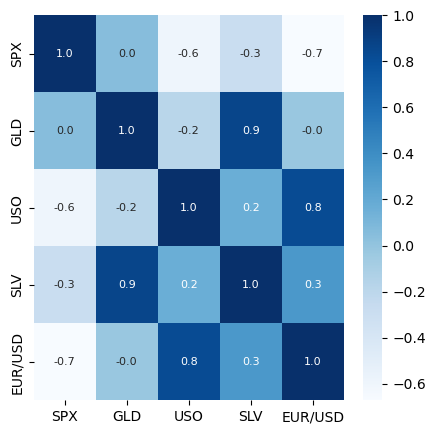

In [16]:
plt.figure(figsize = (5,5))
sns.heatmap(prices_corr, cbar = True, fmt ='.1f', annot = True, annot_kws = {'size':8}, cmap ='Blues')

# Gold corr values

In [17]:
print(prices_corr['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


# Gold distribution

C:\Users\josep\AppData\Local\Temp\ipykernel_4004\2860078325.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'], color = 'r')


<Axes: xlabel='GLD', ylabel='Density'>

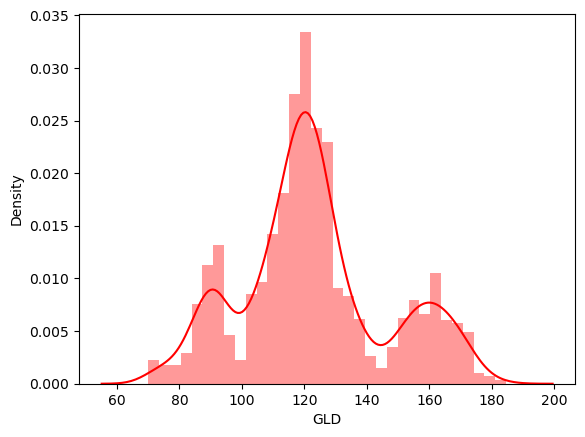

In [20]:
sns.distplot(gold_data['GLD'], color = 'r')

##### Inference : there's three categories of Gold with avg price of 90,120 and 160 respectively

# Splitting the Feautures and  Target

In [22]:
X = gold_data.drop(['Date','GLD'], axis = 1)
y = gold_data['GLD']

In [24]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [25]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


# Splitting data into train and test

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 2)

In [27]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1832, 4), (458, 4), (1832,), (458,))

# Model Training

In [28]:
regressor = RandomForestRegressor(n_estimators=100)

In [29]:
regressor.fit(X_train,y_train)

RandomForestRegressor()

# Model Evaluation

In [35]:
test_data_pred = regressor.predict(X_test)
test_data_pred.shape

(458,)

In [31]:
print(test_data_pred)

[168.57349988  82.08999993 116.29680032 127.84610075 120.71210104
 154.47899685 150.33049834 126.07890067 117.44539857 126.10520039
 116.7262008  172.11810057 141.35089877 167.76869863 115.22759996
 117.64100046 138.28280317 169.89090107 159.15590315 158.11440011
 155.00309985 125.17650045 176.66599971 157.5523032  125.23250031
  93.87739971  76.98710017 120.53440025 119.17199962 167.37469998
  88.07620009 125.18700004  91.05340048 117.53470036 121.1122992
 136.46340066 115.50750098 115.12510076 148.3614003  107.18750084
 103.57900234  87.12349801 126.38030063 117.90240016 155.22299899
 119.47639992 108.3772003  107.87169834  93.16910056 127.20929748
  75.24020023 113.53209897 121.51249989 111.0716989  118.86799869
 120.91249948 158.79859995 166.922301   147.17209748  85.92659884
  94.29420027  86.84149915  90.45770008 118.92620074 126.40470071
 127.62200009 170.64560019 122.24079943 117.44779873  98.69130056
 168.31380158 143.30849769 132.54060297 121.19810219 120.94129954
 119.649900

# Mean-Square Error

In [32]:
mse = metrics.r2_score(y_test, test_data_pred)

In [33]:
print("R squaredd error:", mse)

R squaredd error: 0.9892066018629586


# Compare the actual gold prices and predicted prices

In [36]:
y_test = list(y_test)

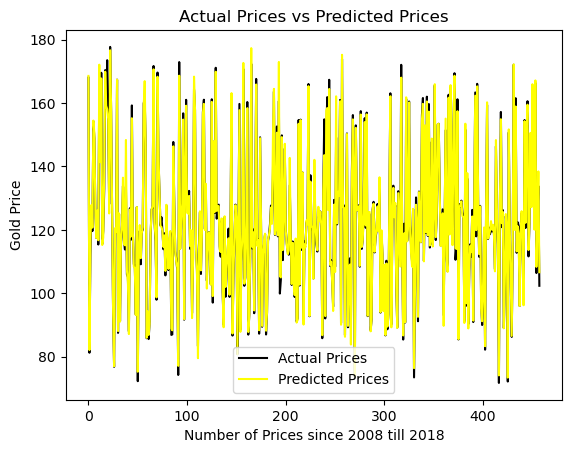

In [39]:
plt.plot(y_test, color = 'black', label = 'Actual Prices')
plt.plot(test_data_pred, color = 'yellow', label = 'Predicted Prices')
plt.title("Actual Prices vs Predicted Prices")
plt.xlabel("Number of Prices since 2008 till 2018")
plt.ylabel("Gold Price")
plt.legend()
plt.show()